In [1]:
library(ggplot2)
library(olsrr)
library(eurostat)
options(width=160, repr.plot.width=11, repr.plot.height=7) 


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




# Cvičení 6: Lineární regrese s faktorovými proměnnými

---

<font color="blue">**Nejprve udělejte úkoly 1.a - 1.c v druhém notebooku.**</font>

---

V tomto cvičení se budeme zabývat regresí s faktorovými - kategorickými - proměnnými. 

Vytvoříme si nejprve nějaká data se známými vlastnostmi:

In [287]:
set.seed(1111)
ndat = 200
height.m <- runif(ndat, 150, 190)
height.f <- runif(ndat, 150, 190)
weight.m <- -76 + 0.88*height.m + rnorm(ndat, 0, sd=4)
weight.f <- -75 + 0.82*height.f + rnorm(ndat, 0, sd=4) 
fct <- gl(2, ndat, labels=c("Male", "Female"))
df <- data.frame(height=c(height.m, height.f),
                 weight=c(weight.m, weight.f),
                 sex=fct)

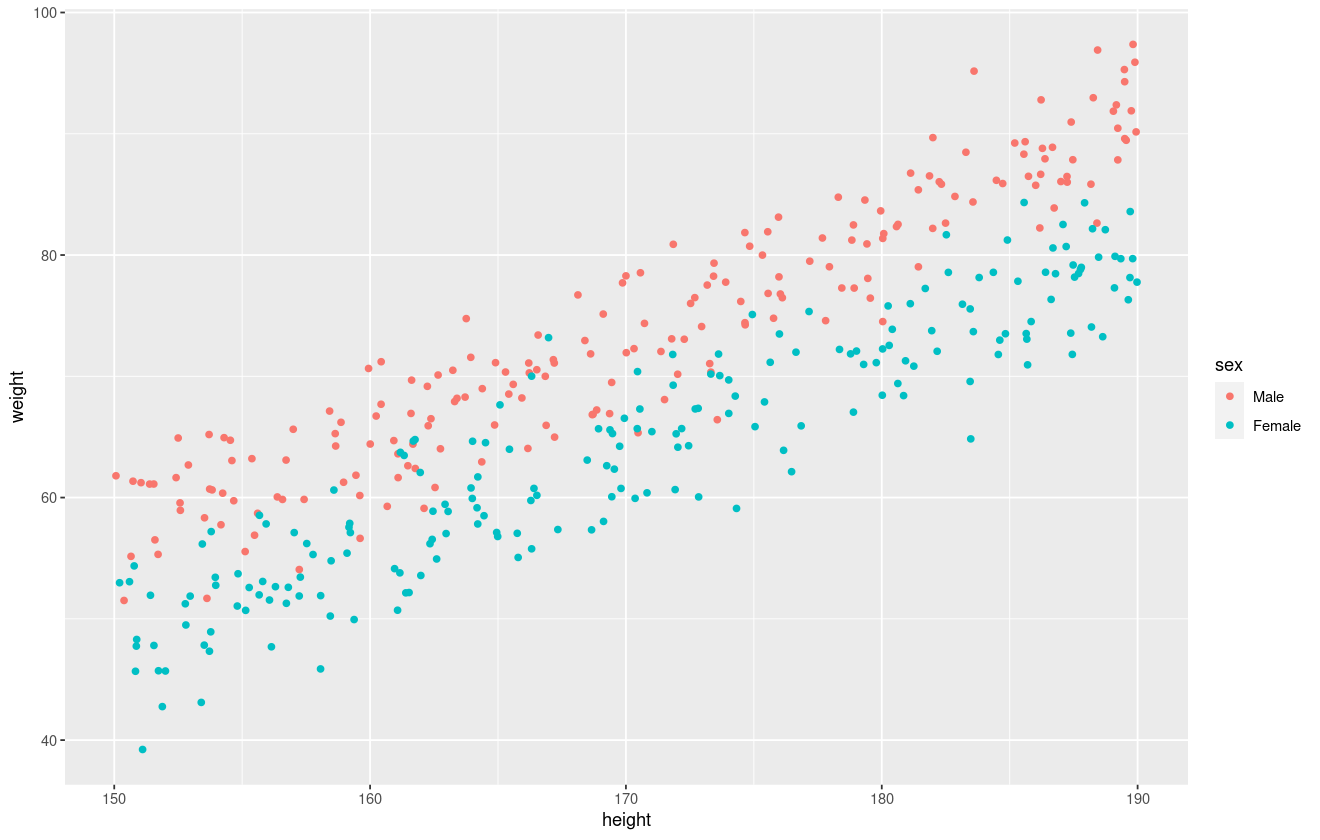

In [288]:
ggplot(df, aes(x=height, y=weight, color=sex)) +
    geom_point()

Pokud bychom neznali systém generující data, mohli bychom se ptát, zdali je mezi faktory *Male* a *Female* nějaký rozdíl. Podívejme na odhady a kvalitu regresního modelu, pokud bychom pracovali s daty zvlášť:

In [289]:
fit.m <- lm(weight.m ~ height.m)
summary(fit.m)


Call:
lm(formula = weight.m ~ height.m)

Residuals:
   Min     1Q Median     3Q    Max 
-9.989 -2.222  0.081  2.658  9.984 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -75.32127    3.75822  -20.04   <2e-16 ***
height.m      0.87417    0.02199   39.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.645 on 198 degrees of freedom
Multiple R-squared:  0.8887,	Adjusted R-squared:  0.8881 
F-statistic:  1581 on 1 and 198 DF,  p-value: < 2.2e-16


In [290]:
fit.f <- lm(weight.f ~ height.f)
summary(fit.f)


Call:
lm(formula = weight.f ~ height.f)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9770 -2.8422  0.0745  2.5610 11.6231 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -72.51609    3.87581  -18.71   <2e-16 ***
height.f      0.80300    0.02271   35.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.872 on 198 degrees of freedom
Multiple R-squared:  0.8633,	Adjusted R-squared:  0.8626 
F-statistic:  1251 on 1 and 198 DF,  p-value: < 2.2e-16


### Společný model

Zkusíme nyní nasadit jeden model, který by měl vysvětlovat závislost mezi proměnnými *height* a *weight* bez ohledu na hodnotu faktoru:

In [303]:
fit.common <- lm(weight ~ height, df)
summary(fit.common)


Call:
lm(formula = weight ~ height, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1501  -4.7856   0.0056   4.8374  15.0683 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -74.46135    4.31353  -17.26   <2e-16 ***
height        0.84180    0.02525   33.33   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.007 on 398 degrees of freedom
Multiple R-squared:  0.7363,	Adjusted R-squared:  0.7356 
F-statistic:  1111 on 1 and 398 DF,  p-value: < 2.2e-16


Warning message in predict.lm(fit.common, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


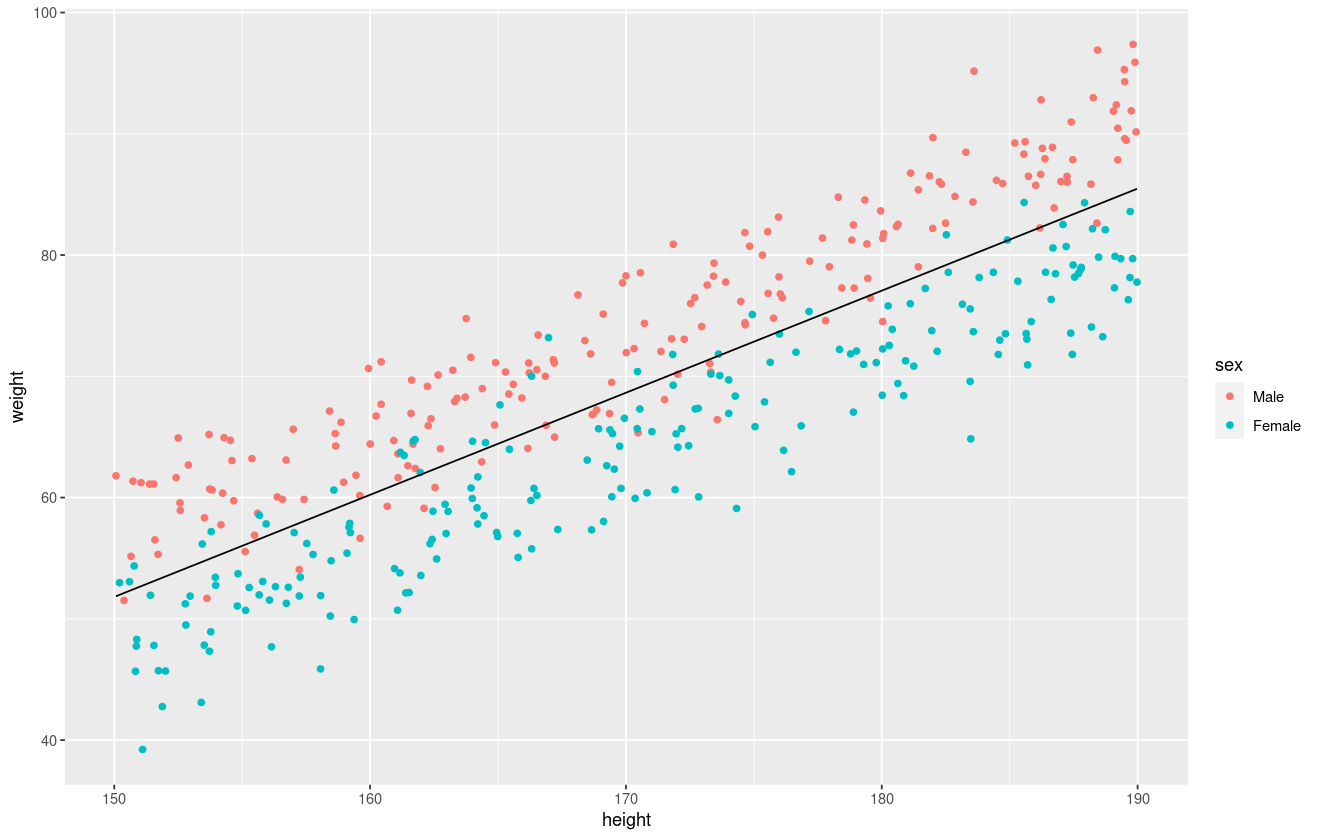

In [304]:
tmp <- predict(fit.common, interval="prediction")
df.common <- cbind(df, tmp)
ggplot(df.common, aes(x=height, y=weight, color=sex)) +
    geom_point() +
    geom_line(aes(y=fit), color="black")

<font color="blue">**Nyní je čas udělat úkol 2.a v druhém notebooku**</font>

---

## Modely s faktorovými proměnnými

Společný model nemusí fungovat dobře a může být výhodné zohlednit hodnoty kategorických proměnných (faktorů). Funkce `lm()` to dovede vyřešit tak, že pro kategorickou proměnnou (faktor) s $n$ hodnotami (levely) vytvoří $n-1$ umělých proměnných nabývajících hodnoty 1, pokud jde o danou hodnotu a 0 pokud nikoliv. Základní hodnota reprezentující první z faktorů je kódována tak, že všechny umělé proměnné jsou nulové.

Zkusíme nyní nafitovat model v následující podobě:

In [301]:
fit.intercept <- lm(weight ~ height + sex, df)
summary(fit.intercept)


Call:
lm(formula = weight ~ height + sex, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4339  -2.6417   0.1033   2.5884  11.7369 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -69.08218    2.72301  -25.37   <2e-16 ***
height        0.83758    0.01589   52.71   <2e-16 ***
sexFemale    -9.32203    0.37800  -24.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.78 on 397 degrees of freedom
Multiple R-squared:  0.8958,	Adjusted R-squared:  0.8953 
F-statistic:  1707 on 2 and 397 DF,  p-value: < 2.2e-16


Funkce `lm()` tedy vytvořila binární proměnnou `sexFemale` s vlastnostmi

$$
\texttt{sexFemale} =
\begin{cases}
1 &\text{pokud }\texttt{sex == Female}, \\
0 &\text{jinak.}
\end{cases}
$$

Dostaneme tedy dvě přímky:

$$
\texttt{weight} = 
\begin{cases}
\hat\beta_0 +\hat\beta_1 \cdot\texttt{height} &\text{pokud }\texttt{sex == Male}, \\
(\hat\beta_0+\hat{\beta_2}) + \hat\beta_1\cdot\texttt{height} &\text{pokud }\texttt{sex == Female},
\end{cases}
$$

kde $\hat\beta_0, \hat\beta_1$ a $\hat\beta_2$ zastupují příslušné odhady.

Warning message in predict.lm(fit.intercept, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


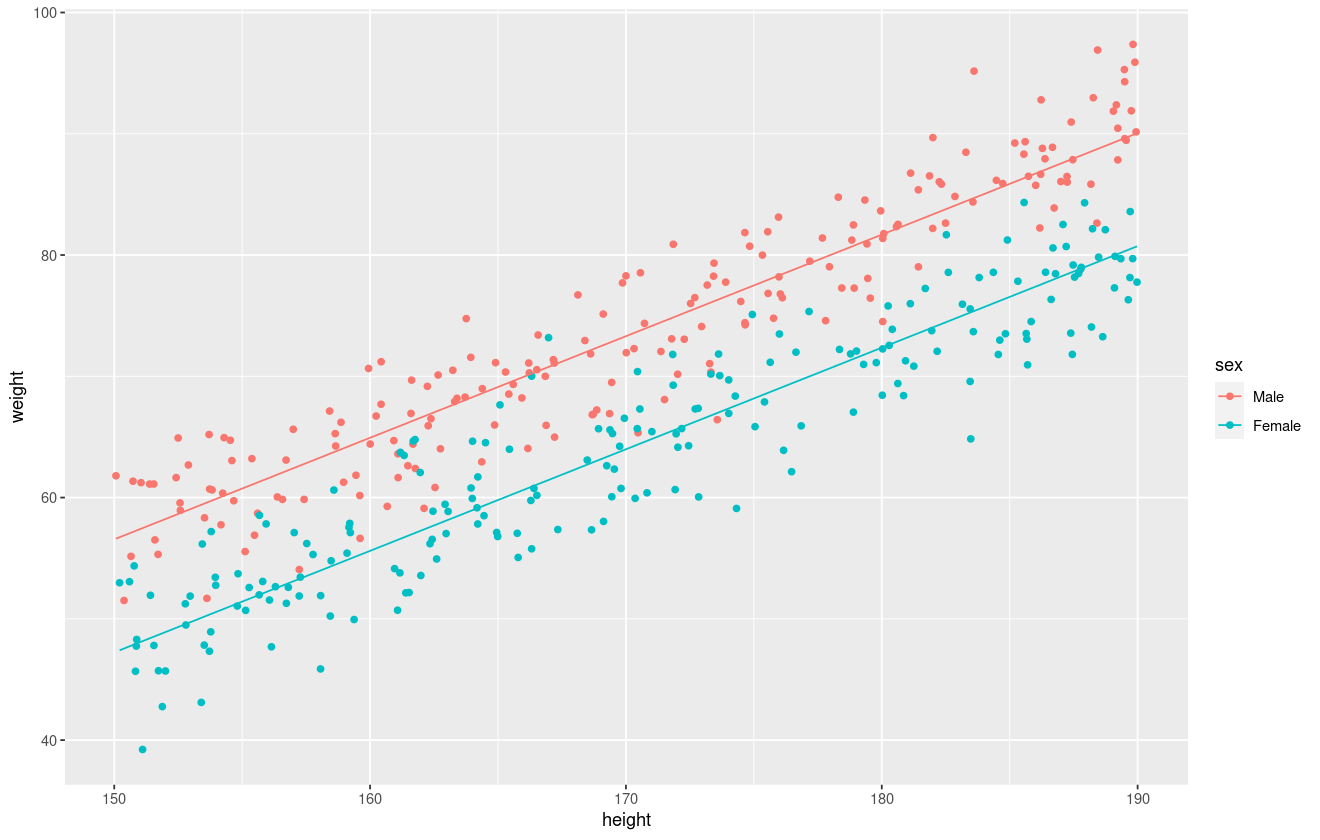

In [302]:
tmp <- predict(fit.intercept, interval="prediction")
df.intercept <- cbind(df, tmp)
ggplot(df.intercept, aes(x=height, y=weight, group=sex, color=sex)) +
    geom_point() +
    geom_line(aes(y=fit))

V příkladech byl základní level `Male`, proto vznikla umělá proměnná `sexFemale`. Pokud bychom chtěli pořadí prohodit, použili bychom funkci `relevel()`.

<font color="blue">**Nyní je čas udělat úkol 3.a v druhém notebooku**</font>

---

### Interakce

Zkusme nyní zkonstruovat jiný model. Ten bude uvažovat **interakci** mezi `sex` a `height`, kterou reprezentujeme pomocí dvojtečky:

In [300]:
fit.slope <- lm(weight ~ height + height:sex, df)
summary(fit.slope)


Call:
lm(formula = weight ~ height + height:sex, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0753  -2.4484   0.0253   2.5978  11.6561 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -73.87724    2.69810  -27.38   <2e-16 ***
height             0.86574    0.01582   54.71   <2e-16 ***
height:sexFemale  -0.05479    0.00220  -24.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.757 on 397 degrees of freedom
Multiple R-squared:  0.8971,	Adjusted R-squared:  0.8966 
F-statistic:  1730 on 2 and 397 DF,  p-value: < 2.2e-16


Opět dostaneme dvě přímky, tentokrát se liší směrnicí:

$$
\texttt{weight} = 
\begin{cases}
\hat\beta_0 +\hat\beta_1 \cdot\texttt{height} &\text{pokud }\texttt{sex == Male}, \\
\hat\beta_0+ (\hat\beta_1 + \hat\beta_2)\cdot\texttt{height} &\text{pokud }\texttt{sex == Female}.
\end{cases}
$$

Warning message in predict.lm(fit.slope, interval = "prediction"):
“predictions on current data refer to _future_ responses
”



Call:
lm(formula = weight ~ height + height:sex, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0753  -2.4484   0.0253   2.5978  11.6561 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -73.87724    2.69810  -27.38   <2e-16 ***
height             0.86574    0.01582   54.71   <2e-16 ***
height:sexFemale  -0.05479    0.00220  -24.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.757 on 397 degrees of freedom
Multiple R-squared:  0.8971,	Adjusted R-squared:  0.8966 
F-statistic:  1730 on 2 and 397 DF,  p-value: < 2.2e-16


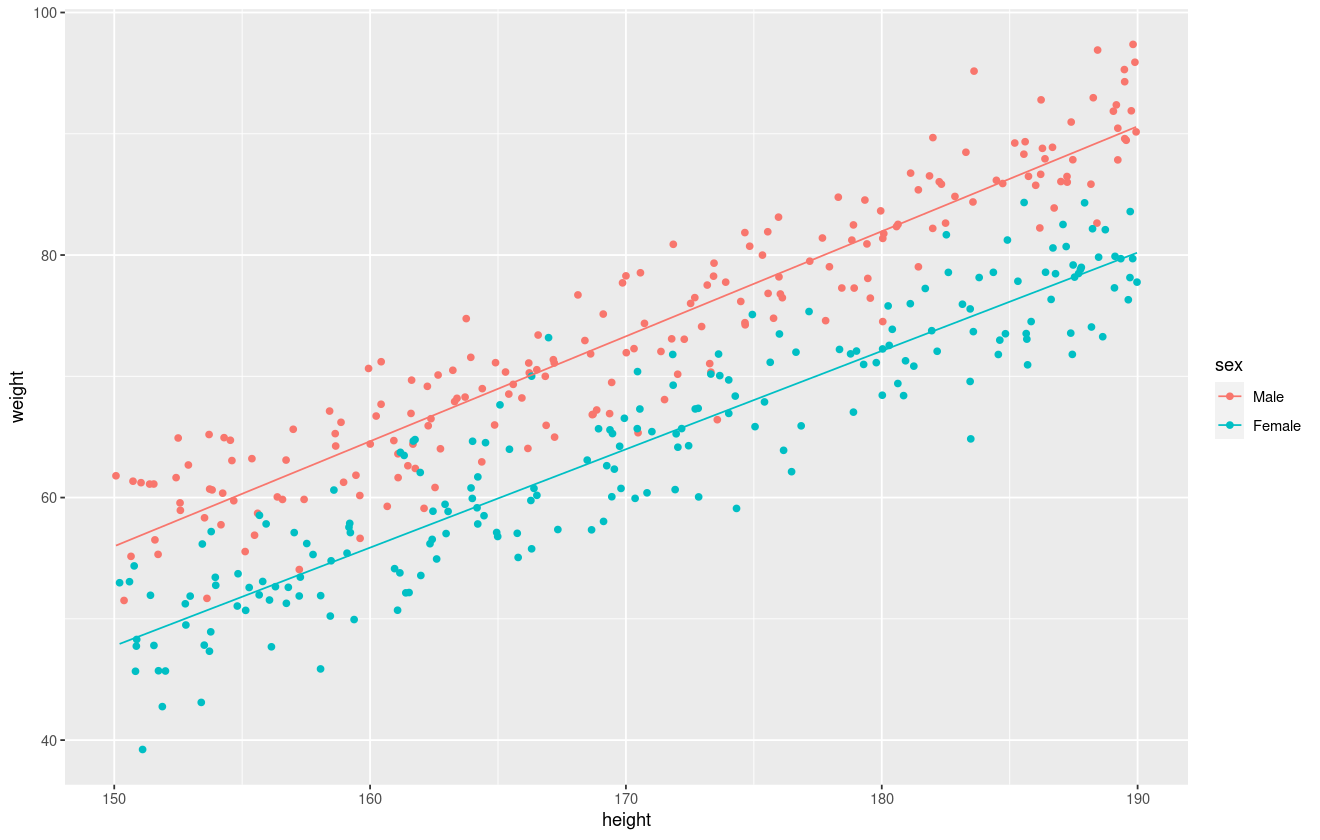

In [298]:
tmp <- predict(fit.slope, interval="prediction")
df.slope <- cbind(df, tmp)
ggplot(df.slope, aes(x=height, y=weight, group=sex, color=sex)) +
    geom_point() +
    geom_line(aes(y=fit))

Poslední variantou, jak konstruovat model je zohlednit hodnotu kategorické proměnné `sex` v posunutí a směrnici současně. Buď můžeme použít dvojtečkovou notaci, nebo hvězdičku:

In [305]:
fit.inter <- lm(weight ~ height*sex, df)
tmp <- predict(fit.inter, interval="prediction")
df.inter <- cbind(df, tmp)
summary(fit.inter)

Warning message in predict.lm(fit.inter, interval = "prediction"):
“predictions on current data refer to _future_ responses
”



Call:
lm(formula = weight ~ height * sex, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9886 -2.4064  0.0745  2.6228 11.6231 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -75.32127    3.87691 -19.428   <2e-16 ***
height             0.87417    0.02268  38.540   <2e-16 ***
sexFemale          2.80518    5.40353   0.519    0.604    
height:sexFemale  -0.07117    0.03163  -2.250    0.025 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.761 on 396 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8964 
F-statistic:  1151 on 3 and 396 DF,  p-value: < 2.2e-16


Výsledné dvě přímky budou mít tvar:

$$
\texttt{weight} = 
\begin{cases}
\hat\beta_0 +\hat\beta_1 \cdot\texttt{height} &\text{pokud }\texttt{sex == Male}, \\
(\hat\beta_0 + \hat\beta_2) + (\hat\beta_1 + \hat\beta_3)\cdot\texttt{height} &\text{pokud }\texttt{sex == Female}.
\end{cases}
$$

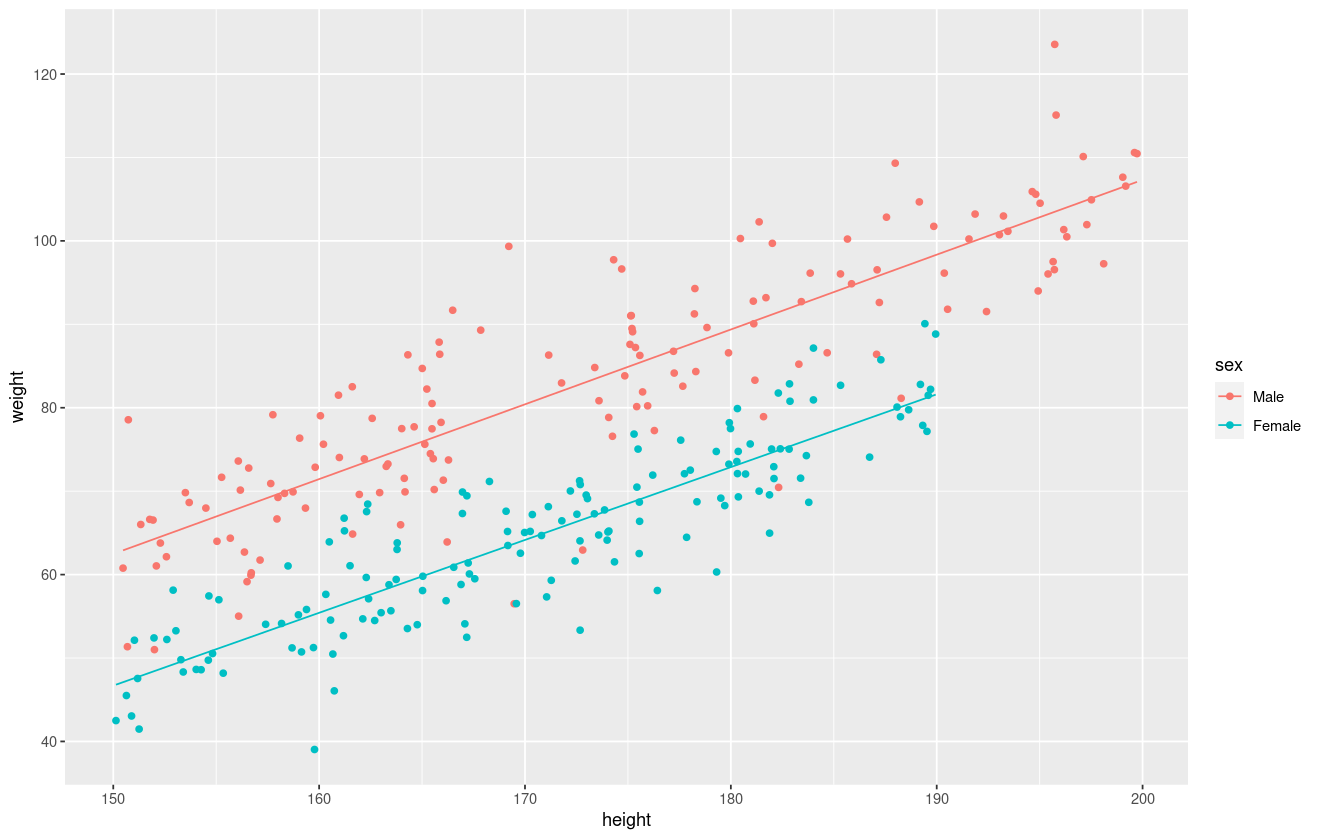

In [221]:
ggplot(df.inter, aes(x=height, y=weight, group=sex, color=sex)) +
    geom_point() +
    geom_line(aes(y=fit))

<font color="blue">**Nyní je čas udělat úkol 3.b v druhém notebooku**</font>

---

### Několik modelů, co dál?

Výše jsme odhadli parametry několika modelů a stojíme před úkolem [vybrat nejvhodnější model](https://en.wikipedia.org/wiki/Model_selection). Touto problematikou se budeme na předmětu ještě zevrubně zabývat. V tuto chvíli ale můžeme naše rozhodnutí postavit následovně:
- vždy bychom měli vybírat z takové množiny modelů, u kterých jsou koeficienty statisticky významně odlišné od nuly. (*proč?*)
- obecně preferujeme modely jednodušší před komplexnějšími. (*proč?*)
- zohledníme hodnoty [(adjustovaného) koeficientu determinace](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$ resp. $R_{\text{adj}}^2$. (*proč adjustovaného?*)
- vždy provedeme [diagnostiku vybraného modelu](https://en.wikipedia.org/wiki/Regression_diagnostic), zvl. z hlediska vlastností reziduí. To bylo obsahem minulého cvičení.

V budoucích přednáškách a cvičeních se navíc dozvíte, jak model vůbec vhodně navrhnout, aby bylo z čeho vybírat. Existují i nástroje, které tuto činnost značně usnadní (viz balík [olsrr](https://cran.r-project.org/web/packages/olsrr/vignettes/intro.html)).

<font color="blue">**Vraťte se k úlohám a diskutujte o výběru modelu. Následně proveďte analýzu reziduí vybraného modelu (úloha 4.a).**</font>

---

## Dodatky

### Formula pro lm()

Předpokládejme, že $x_1$ a $x_2$ nejsou faktorové proměnné. Chceme-li v modelu vynechat posunutí (intercept), použijeme `-1`. Pokud potřebujeme využít nějakou funkci, musíme ji obalit `I()`.

| Příkaz | Model s odhady |
|-----|-----|
|`lm(y ~ x)` | $$y = \hat\beta_0 + \hat\beta_1 x$$ |
|`lm(y ~ x-1)` | $$y = \hat\beta_1 x$$ |
|`lm(y ~ x1 + x2)` | $$y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2$$ | 
|`lm(y ~ x1 + x1:x2)` | $$y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_1\cdot x_2$$ |
|`lm(y ~ x1*x2)` | $$y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 + \hat\beta_3 x_1\cdot x_2$$ |
|`lm(y ~ I(x1+x2))` | $$y = \hat\beta_0 + \hat\beta_1 (x_1 + x_2)$$ |


### Kontrasty (contrasts)

S problematikou faktorů v R úzce souvisí *kontrasty* (contrasts). Ty by ovšem vydaly na celé cvičení, proto jejich nastudování zůstává zájemcům na samostatnou práci. 